In [33]:
import dicom2nifti
import os
from glob import glob
import matplotlib.pyplot as plt

### Load path files

In [14]:
global_path = '/Users/Maxy/Desktop/GBM/Herramienta CAD/TCGA-GBM/TCGA-02-0003/06-08-1997-MRI BRAIN WWO CONTRAMR-81239/*' #we choose all dicom files at the same time
output_path = '/Users/Maxy/Desktop/GBM/Herramienta CAD/TCGA-GBM/TCGA-02-0003/NIFTI_FILES'

In [16]:
print(glob(global_path)) #this function creates an array whit the paths of the four modalities

['/Users/Maxy/Desktop/GBM/Herramienta CAD/TCGA-GBM/TCGA-02-0003/06-08-1997-MRI BRAIN WWO CONTRAMR-81239/10-AX T2 FSE-23822', '/Users/Maxy/Desktop/GBM/Herramienta CAD/TCGA-GBM/TCGA-02-0003/06-08-1997-MRI BRAIN WWO CONTRAMR-81239/13-AX T1 POST-19694', '/Users/Maxy/Desktop/GBM/Herramienta CAD/TCGA-GBM/TCGA-02-0003/06-08-1997-MRI BRAIN WWO CONTRAMR-81239/12-AX T1-90444', '/Users/Maxy/Desktop/GBM/Herramienta CAD/TCGA-GBM/TCGA-02-0003/06-08-1997-MRI BRAIN WWO CONTRAMR-81239/11-AX FLAIR-06577']


In [18]:
for i, modality in enumerate(glob(global_path)): #we save the nifti files 
    
    if i == 0 : 
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(output_path, 't2_test.nii'))
    elif i == 1 : 
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(output_path, 't1c_test.nii'))
    elif i == 2 :
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(output_path, 't1_test'))
    else :
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(output_path, 'flair_test'))
        

### Visualizing the data

In [19]:
%matplotlib inline

import ants
import SimpleITK as sitk

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.4.2
SimpleITK version = 2.3.1


In [52]:
path_t1 = os.path.join(output_path, 't1_test.nii') #upload the files path
path_t1c = os.path.join(output_path, 't1c_test.nii')
path_t2 = os.path.join(output_path, 't2_test.nii')
path_flair = os.path.join(output_path, 'flair_test.nii')

t1_ex = ants.image_read(path_t1, reorient='IAL')
t1c_ex = ants.image_read(path_t1c, reorient='IAL')
t2_ex = ants.image_read(path_t2, reorient='IAL')
flair_ex = ants.image_read(path_flair, reorient='IAL')

In [53]:
print('t1: ', t1_ex)
print('t1c: ', t1c_ex)
print('t2: ', t2_ex)
print('flair: ', flair_ex)

t1:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (25, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (99.2188, -115.8, -67.1)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t1c:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (25, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (99.2188, -115.8, -67.1)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t2:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (25, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (99.2188, -115.8, -67.1)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

flair:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (25, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (99.2188, -115.8, -67.1)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



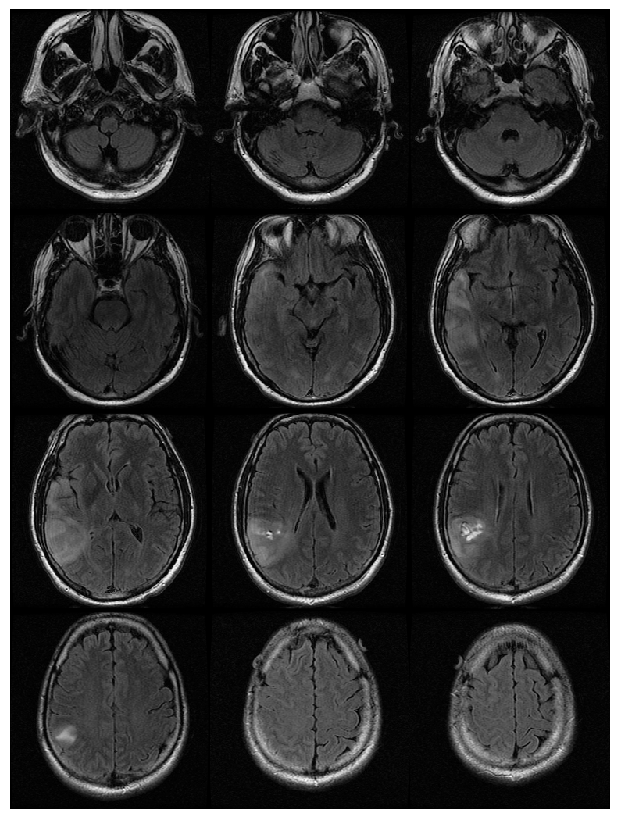

In [66]:
ants.plot(flair_ex, figsize=2, axis=2)

### Co Registration 

First, we start with the co-registration of the MRIs of t1c, t2 and flair with respect to t1

In [55]:
template = t1_ex

transformation_t1c = ants.registration(
    fixed=template,
    moving=t1c_ex, 
    type_of_transform='SyN',
    verbose=True
)
transformation_t2 = ants.registration(
    fixed=template,
    moving=t2_ex, 
    type_of_transform='SyN',
    verbose=True
)

transformation_flair = ants.registration(
    fixed=template,
    moving=flair_ex, 
    type_of_transform='SyN',
    verbose=True
)


antsRegistration -d 3 -r [0x7fe024a4d8f0,0x7fe021196fa0,1] -m mattes[0x7fe024a4d8f0,0x7fe021196fa0,1,32,regular,0.2] -t Affine[0.25] -c 2100x1200x1200x0 -s 3x2x1x0 -f 4x2x2x1 -x [NA,NA] -m mattes[0x7fe024a4d8f0,0x7fe021196fa0,1,32] -t SyN[0.200000,3.000000,0.000000] -c [40x20x0,1e-7,8] -s 2x1x0 -f 4x2x1 -u 1 -z 1 -o [/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp63l_cl96,0x7fe00c0c34d0,0x7fe023dc7370] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x7fe024a4d8f0 and moving image: 0x7fe021196fa0 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
    Registration stage 1
      No fixed mask
      No moving mask
  number of levels = 4
  number of levels = 3
  fixed image: 0x7fe024a4d8f0
  moving image: 0x7fe021196fa0
  fixed image: 0x7

In [56]:
print('t1c:', transformation_t1c)
print('t2:', transformation_t2)
print('flair:', transformation_flair)

t1c: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (25, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (99.2188, -115.8, -67.1)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (25, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (99.2188, -115.8, -67.1)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp63l_cl961Warp.nii.gz', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp63l_cl960GenericAffine.mat'], 'invtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp63l_cl960GenericAffine.mat', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp63l_cl961InverseWarp.nii.gz']}
t2: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (25, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.781

In [57]:
t1c_reg= transformation_t1c['warpedmovout']
t2_reg = transformation_t2['warpedmovout']
flair_reg = transformation_flair['warpedmovout']

In [58]:
print(t1c_reg)

ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (25, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (99.2188, -115.8, -67.1)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



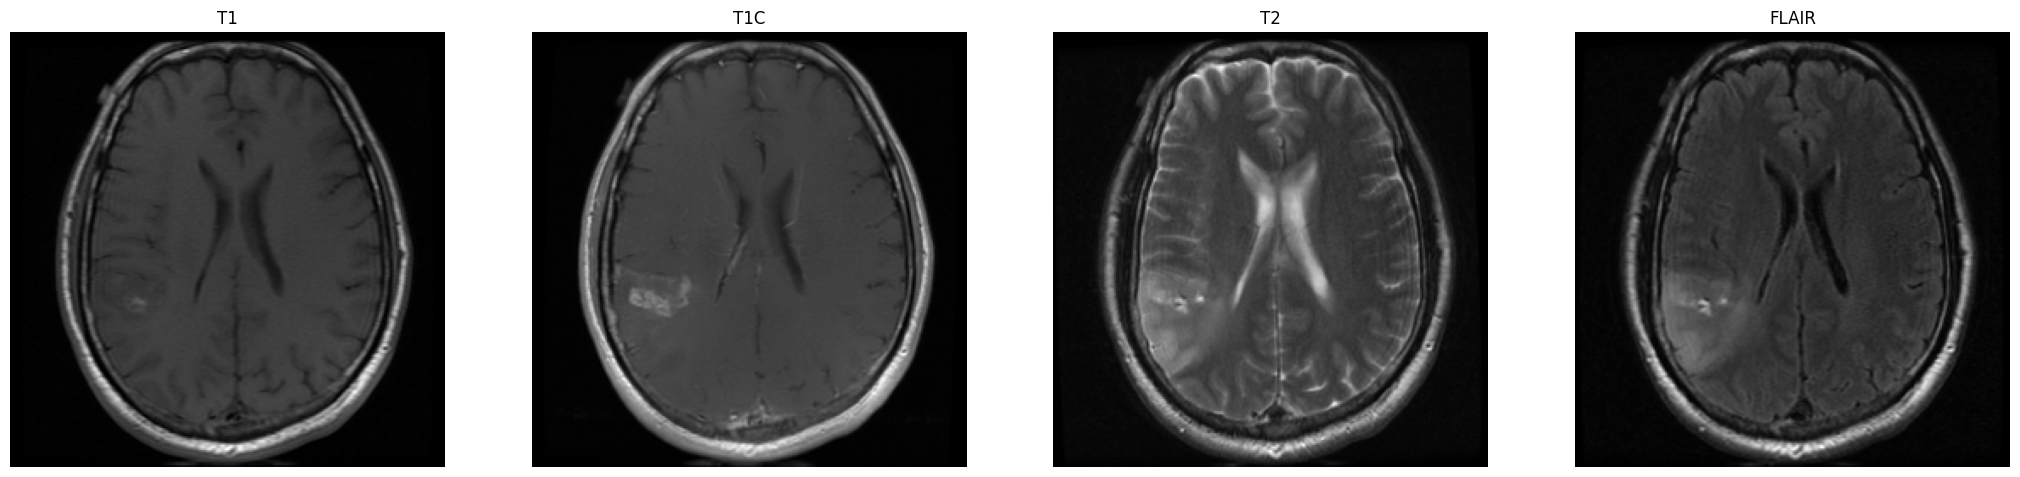

In [65]:
f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (img, title) in enumerate(zip([t1_ex, t1c_reg, t2_reg, flair_reg], ['T1', 'T1C', 'T2', 'FLAIR'])):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(img[:][:][15], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

### T1 Brain extraction 

In [67]:
from antspynet.utilities import brain_extraction

2024-02-06 23:14:52.860335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/Maxy/Desktop/GBM/Herramienta CAD/.venv/lib/python3.9/site-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/Maxy/Desktop/GBM/Herramienta CAD/.venv/lib/python3.9/site-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [68]:
prob_brain_mask = brain_extraction(t1_ex, modality="t1", verbose=True,)

Brain extraction:  retrieving model weights.
5683832/5683832 [==============================] - 2s 0us/step
Brain extraction:  retrieving template.
14969865/14969865 [==============================] - 4s 0us/step
Brain extraction:  normalizing image to the template.
Brain extraction:  prediction and decoding.
1/1 [==============================] - 5s 5s/step
Brain extraction:  renormalize probability mask to native space.


Inspect probabilities array

ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (25, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (99.2188, -115.8, -67.1)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



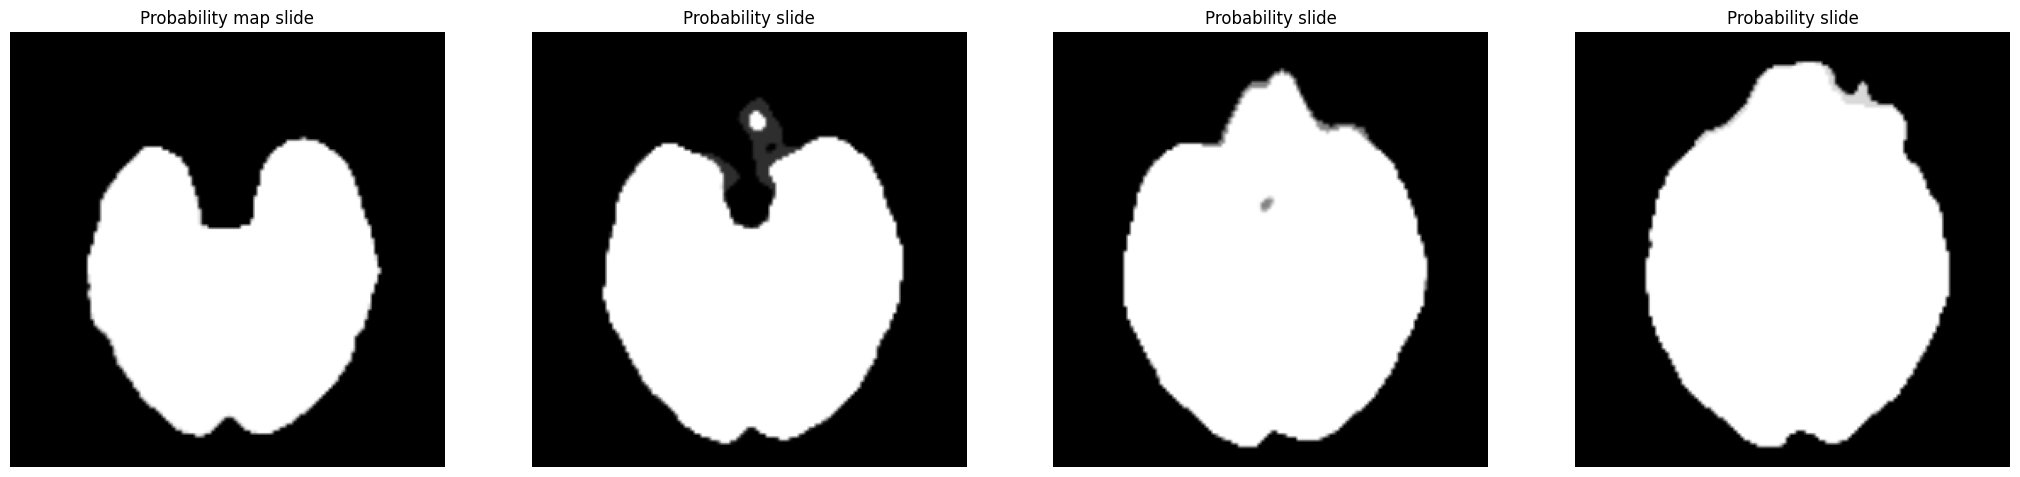

In [78]:
print(prob_brain_mask)

f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (title) in enumerate( ['Probability map slide', 'Probability slide', 'Probability slide', 'Probability slide']):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(prob_brain_mask[i+8][:][:], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

Get T1 mask

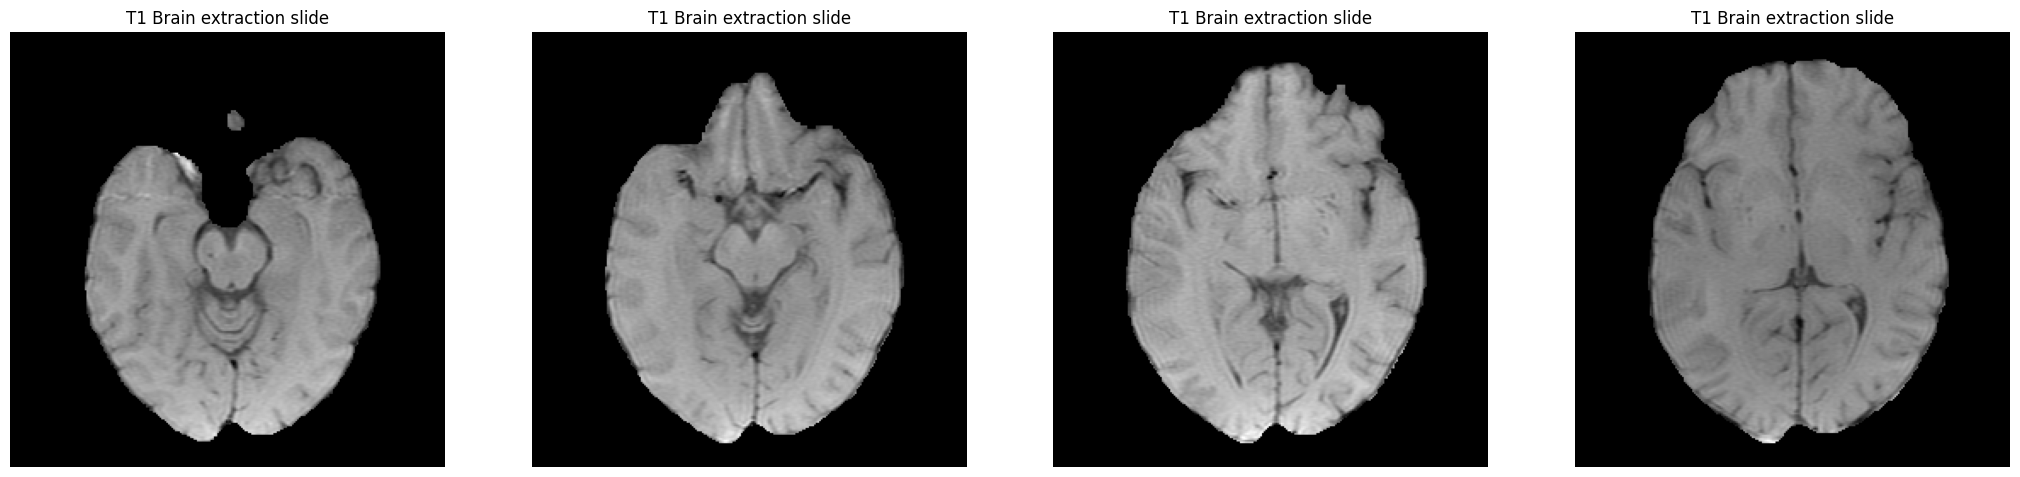

In [81]:
brain_mask_t1 = ants.get_mask(prob_brain_mask, low_thresh=0.5)

masked_t1 = ants.mask_image(t1_ex, brain_mask_t1)

f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (title) in enumerate( ['T1 Brain extraction slide', 'T1 Brain extraction slide', 'T1 Brain extraction slide', 'T1 Brain extraction slide']):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(masked_t1[i+9][:][:], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

Now we have the t1 mask, we do the same for t1c, t2 and flair

In [83]:
masked_t1c = ants.mask_image(t1c_reg, brain_mask_t1)
masked_t2 = ants.mask_image(t2_reg, brain_mask_t1)
masked_flair = ants.mask_image(flair_reg, brain_mask_t1)



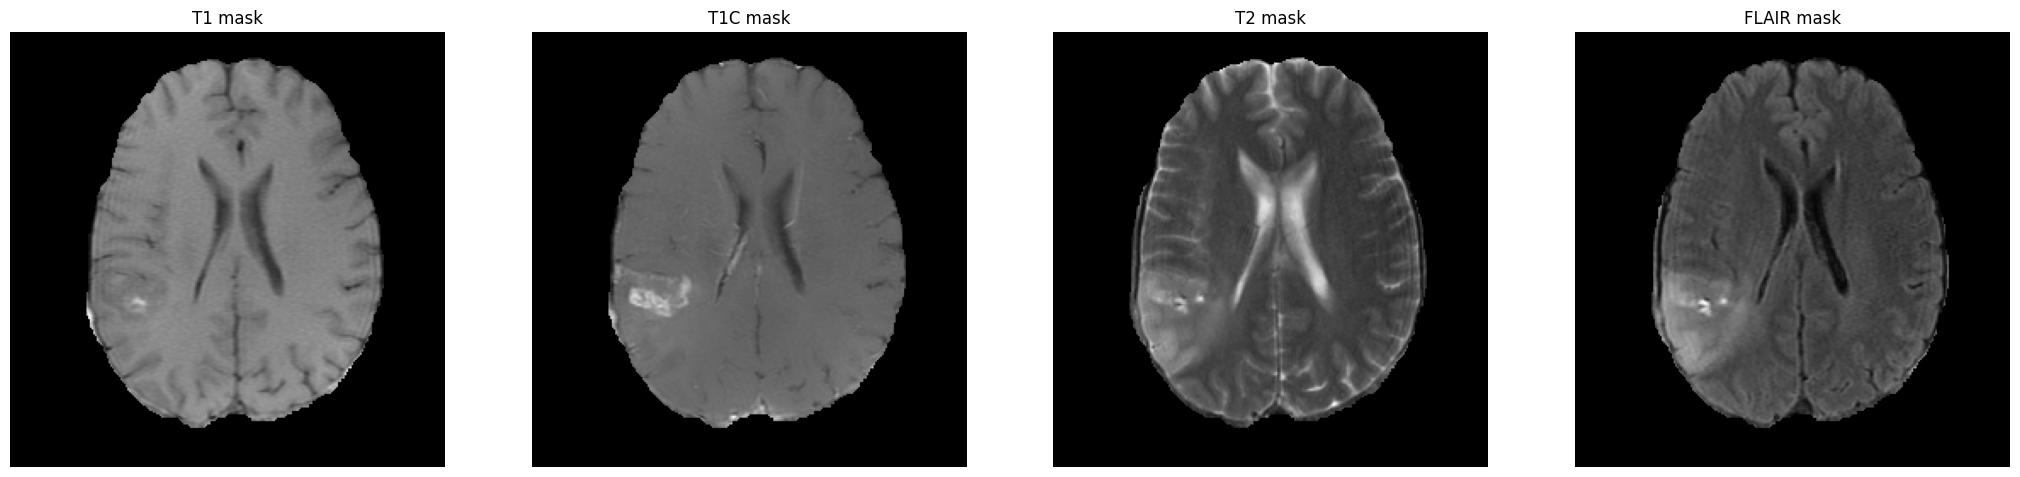

In [84]:
f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (img, title) in enumerate(zip([masked_t1, masked_t1c, masked_t2, masked_flair], ['T1 mask', 'T1C mask', 'T2 mask', 'FLAIR mask'])):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(img[:][:][15], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()